## 加载数据

In [12]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 1. 数据加载
data = pd.read_csv('polymer_microstructure_data.csv')
data

,x,y,size,shape
0,5.248357,4.930868,0.963628,0.580234
1,5.323844,5.761515,1.292360,1.024511
2,4.882923,4.882932,1.210197,0.910397
3,5.789606,5.383717,1.812200,1.482379
4,4.765263,5.271280,0.186348,0.612039
...,...,...,...,...
185,0.863198,17.822862,0.405295,0.972067
186,10.554022,19.859296,0.454477,1.064841
187,1.475931,11.077086,0.641681,0.565709
188,19.386051,10.461957,0.429410,1.275528


## 可视化原始数据

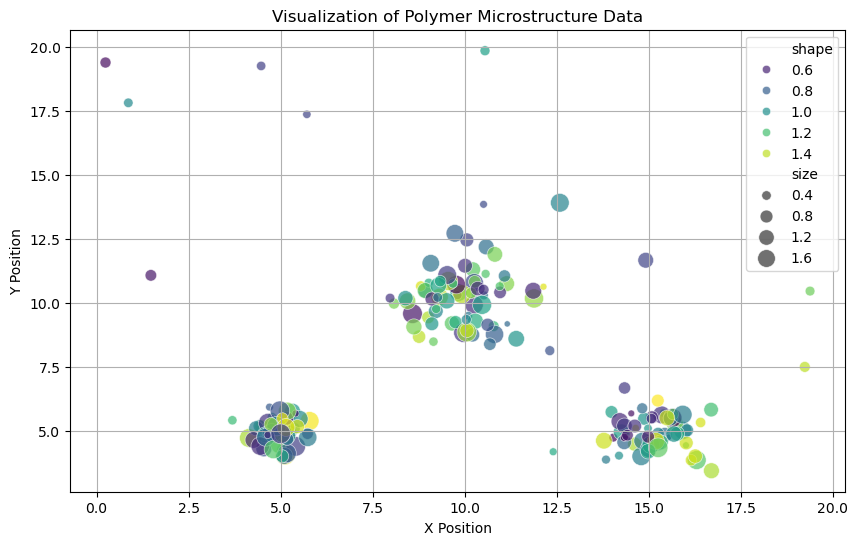

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载CSV文件
csv_filename = 'polymer_microstructure_data.csv'
data = pd.read_csv(csv_filename)

# 绘制散点图：x 和 y 作为位置坐标，size 作为颗粒大小
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='x', y='y', size='size', hue='shape', palette='viridis', sizes=(20, 200), alpha=0.7)

# 设置图表标题和标签
plt.title('Visualization of Polymer Microstructure Data')
plt.xlabel('X Position')
plt.ylabel('Y Position')
#plt.colorbar(label='Shape (Aspect Ratio)')
plt.grid(True)

# 显示图表
plt.show()


## 机器学习

参数评估结果（部分）：
eps: 0.2, min_samples: 2, silhouette_score: -0.2693
eps: 0.30000000000000004, min_samples: 2, silhouette_score: -0.3006
eps: 0.30000000000000004, min_samples: 3, silhouette_score: -0.2138
eps: 0.4, min_samples: 2, silhouette_score: -0.0200
eps: 0.4, min_samples: 3, silhouette_score: -0.1406
eps: 0.4, min_samples: 4, silhouette_score: -0.2867
eps: 0.5, min_samples: 2, silhouette_score: 0.1578
eps: 0.5, min_samples: 3, silhouette_score: 0.0980
eps: 0.5, min_samples: 4, silhouette_score: -0.0881
eps: 0.5, min_samples: 5, silhouette_score: -0.2315

最佳参数：eps = 0.9, min_samples = 7
最佳模型的轮廓系数：0.2769


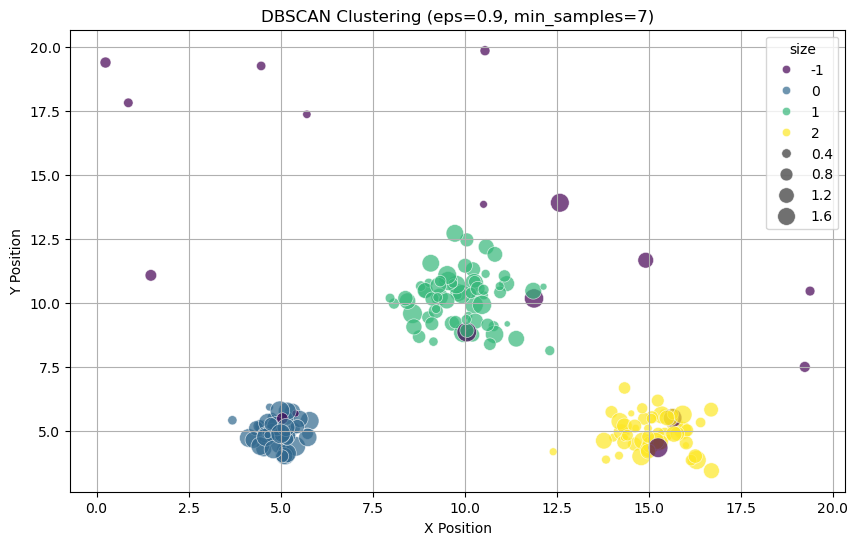

In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 加载数据
csv_filename = 'polymer_microstructure_data.csv'
data = pd.read_csv(csv_filename)

# 2. 数据标准化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['x', 'y', 'size', 'shape']])

# 3. 定义超参数范围
eps_values = np.arange(0.1, 1.0, 0.1)  # 邻域半径
min_samples_values = range(2, 10)      # 最小样本数

# 4. 初始化列表保存每组参数的评估结果
evaluation_results = []
best_silhouette_score = -1  # 初始化最优轮廓系数

# 5. 尝试不同的参数组合并进行聚类
for eps in eps_values:
    for min_samples in min_samples_values:
        # 创建并拟合DBSCAN模型
        db = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = db.fit_predict(scaled_data)

        # 过滤噪声点 (-1)，仅在有效簇数大于1时计算轮廓系数
        n_clusters = len(set(clusters) - {-1})
        if n_clusters > 1:
            silhouette_avg = silhouette_score(scaled_data, clusters)
            evaluation_results.append((eps, min_samples, silhouette_avg))

            # 更新最佳参数
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples
                best_clusters = clusters  # 保存最佳簇结果

# 6. 显示每组参数的评估结果
print("参数评估结果（部分）：")
for result in evaluation_results[:10]:  # 打印部分结果示例
    print(f'eps: {result[0]}, min_samples: {result[1]}, silhouette_score: {result[2]:.4f}')

# 7. 输出最佳参数和轮廓系数
print(f"\n最佳参数：eps = {best_eps}, min_samples = {best_min_samples}")
print(f"最佳模型的轮廓系数：{best_silhouette_score:.4f}")

# 8. 可视化最佳模型的结果
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['x'], y=data['y'], hue=best_clusters, palette='viridis', size=data['size'],
    sizes=(20, 200), alpha=0.7
)
plt.title(f'DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.show()